In [200]:
import zipfile
import pandas as pd
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import pymongo
import datetime

In [277]:
dfs=[pd.read_csv(f'../Resources/cobra{i}.zip',compression='zip') for i in range(5)]

 

dfs[0].head()

,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,beat,zone,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,409,4,"2111 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",13A,AGG ASSAULT,Adams Park,R,33.706526,-84.458000
1,203421469,2/27/2022,12/7/2020,Monday,2.0,19:43,12/7/2020,20:26,405,4,"150 PEYTON PL SW\nATLANTA, GA 30311\nUNITED ST...",23B,LARCENY-NON VEHICLE,Harland Terrace,I,33.750613,-84.473202
2,203530136,2/21/2022,12/18/2020,Friday,6.0,01:28,12/18/2020,01:48,405,4,"2460 MARTIN LUTHER KING JR DR SW\nATLANTA, GA ...",23H,LARCENY-NON VEHICLE,Harland Terrace,I,33.752019,-84.468223
3,210121730,1/12/2022,1/12/2021,Tuesday,3.0,19:33,1/12/2021,19:38,509,5,"396 PIEDMONT AVE NE\nATLANTA, GA 30308\nUNITED...",13A,AGG ASSAULT,Downtown,M,33.764937,-84.382610
4,210638051,2/2/2022,3/4/2021,Thursday,5.0,19:50,3/4/2021,19:50,707,7,"4300 GLOBAL GATEWAY CONN\nCOLLEGE PARK, GA 303...",240,AUTO THEFT,NaN,NaN,33.637951,-84.468052


In [278]:
dfs[0].columns

Index(['offense_id', 'rpt_date', 'occur_date', 'occur_day', 'occur_day_num',
       'occur_time', 'poss_date', 'poss_time', 'beat', 'zone', 'location',
       'ibr_code', 'UC2_Literal', 'neighborhood', 'npu', 'lat', 'long'],
      dtype='object')

In [280]:
dfs[4].columns

Index(['Report Number', 'Report Date', 'Occur Date', 'Occur Time',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Location', 'Shift Occurence', 'Location Type',
       'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 'Latitude',
       'Longitude'],
      dtype='object')

In [64]:
df_2009_2019.columns

Index(['Report Number', 'Report Date', 'Occur Date', 'Occur Time',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Location', 'Shift Occurence', 'Location Type',
       'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 'Latitude',
       'Longitude'],
      dtype='object')

In [3]:
#checking duplicate row 
df_2009_2019.duplicated().sum()

6

In [4]:
df_2009_2019.drop_duplicates(inplace=True)

In [5]:
df_2009_2019.duplicated().sum()

0

In [6]:
#checking duplicate row 
df_2009_2019.duplicated(subset=['Report Number']).sum()

299

In [7]:
df_2009_2019.drop_duplicates(inplace=True,subset=['Report Number'])

In [8]:
df_2009_2019.duplicated(subset=['Report Number']).sum()

0

In [9]:
#checking number of null columns
df_2009_2019.isna().sum()

Report Number                   0
Report Date                     0
Occur Date                      0
Occur Time                      0
Possible Date                  18
Possible Time                  19
Beat                           24
Apartment Office Prefix    332528
Apartment Number           274404
Location                        2
Shift Occurence                 0
Location Type                9210
UCR Literal                     0
UCR #                           0
IBR Code                      170
Neighborhood                12351
NPU                           139
Latitude                        0
Longitude                       0
dtype: int64

<AxesSubplot:>

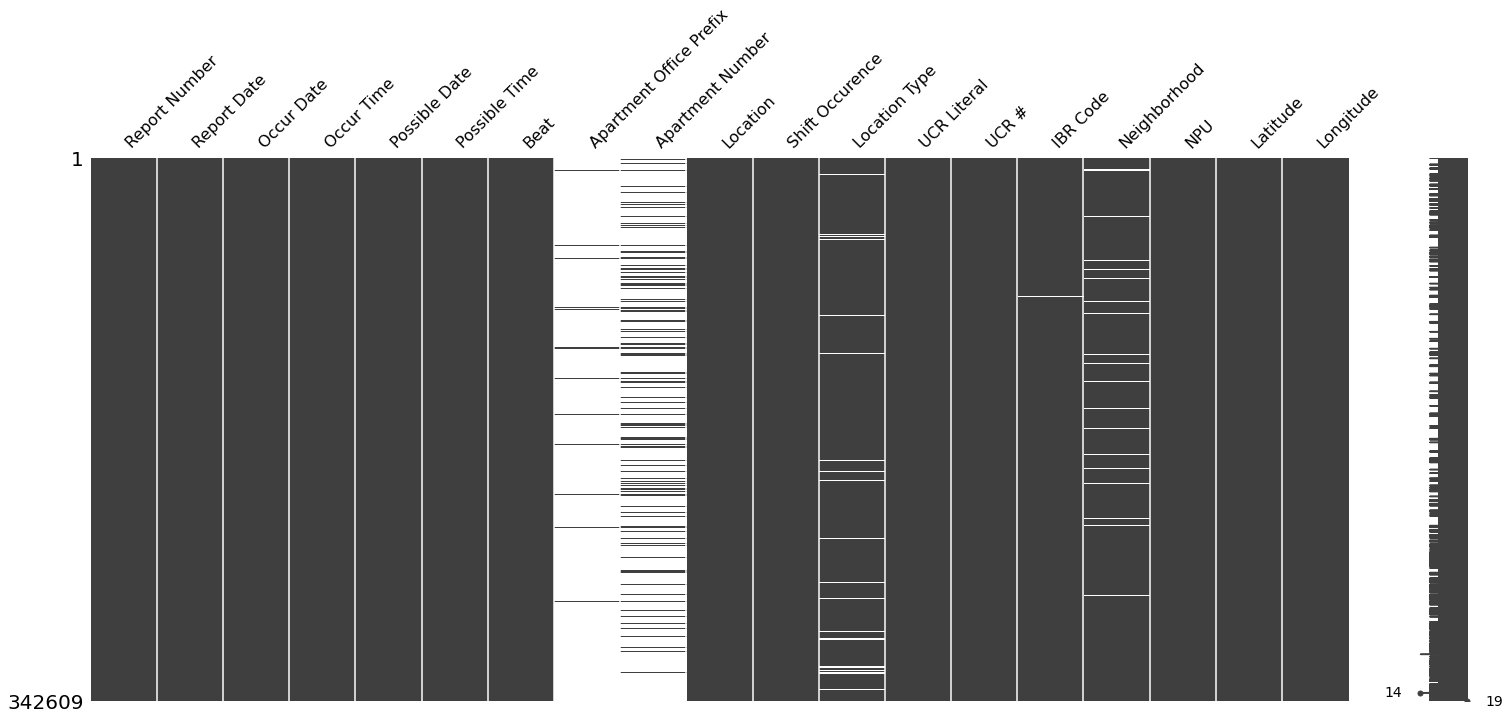

In [10]:
msno.matrix(df_2009_2019)

In [11]:
df_2009_2019

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,2019-12-31,2030,2019-12-31,2034.0,105.0,NaN,NaN,1385 SHARON ST NW,Morning Watch,20.0,AGG ASSAULT,420,1315K,Hunter Hills,K,33.75486,-84.43287
342910,193650336,2019-12-31,2019-12-31,432,2019-12-31,432.0,206.0,NaN,NaN,262 PHARR RD NE,Morning Watch,NaN,AGG ASSAULT,410,1314,Buckhead Village,B,33.83732,-84.37860
342911,193650603,2019-12-31,2019-12-31,920,2019-12-31,940.0,404.0,NaN,NaN,689 CASCADE AVE SW,Day Watch,18.0,AGG ASSAULT,410,1314,Westview,T,33.73636,-84.43680
342912,193651760,2019-12-31,2019-12-31,1853,2019-12-31,1900.0,404.0,NaN,NaN,763 CASCADE AVE SW,Evening Watch,26.0,AGG ASSAULT,410,1314,Westview,T,33.73483,-84.43750


In [14]:
df_2009_2019.drop(inplace=True,columns=['Apartment Office Prefix', 'Apartment Number','Possible Date','Possible Time'])

In [31]:
df_2009_2019['Neighborhood'].nunique()

243

In [33]:
year_map_df=df_2009_2019[["Report Number","Occur Date","Latitude","Longitude","UCR Literal","NPU","Beat"]]

In [41]:
year_map_df.isna().sum()

Report Number      0
Occur Date         0
Latitude           0
Longitude          0
UCR Literal        0
NPU              139
Beat              24
Occur year         0
Occur month        0
dtype: int64

In [42]:
year_map_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342609 entries, 0 to 342913
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Report Number  342609 non-null  int64         
 1   Occur Date     342609 non-null  datetime64[ns]
 2   Latitude       342609 non-null  float64       
 3   Longitude      342609 non-null  float64       
 4   UCR Literal    342609 non-null  object        
 5   NPU            342470 non-null  object        
 6   Beat           342585 non-null  float64       
 7   Occur year     342609 non-null  int64         
 8   Occur month    342609 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 26.1+ MB


In [43]:
#changing the date column to datetime format
year_map_df["Occur Date"]=pd.to_datetime(year_map_df["Occur Date"])
year_map_df["Occur year"]=year_map_df["Occur Date"].dt.year
year_map_df["Occur month"]=year_map_df["Occur Date"].dt.month_name()
year_map_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342609 entries, 0 to 342913
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Report Number  342609 non-null  int64         
 1   Occur Date     342609 non-null  datetime64[ns]
 2   Latitude       342609 non-null  float64       
 3   Longitude      342609 non-null  float64       
 4   UCR Literal    342609 non-null  object        
 5   NPU            342470 non-null  object        
 6   Beat           342585 non-null  float64       
 7   Occur year     342609 non-null  int64         
 8   Occur month    342609 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 26.1+ MB


In [44]:
year_map_df

,Report Number,Occur Date,Latitude,Longitude,UCR Literal,NPU,Beat,Occur year,Occur month
0,90010930,2009-01-01,33.68845,-84.49328,LARCENY-NON VEHICLE,R,411.0,2009,January
1,90011083,2009-01-01,33.75320,-84.39201,LARCENY-NON VEHICLE,M,511.0,2009,January
2,90011208,2009-01-01,33.75735,-84.50282,LARCENY-NON VEHICLE,H,407.0,2009,January
3,90011218,2009-01-01,33.84676,-84.36212,LARCENY-NON VEHICLE,B,210.0,2009,January
4,90011289,2009-01-01,33.68677,-84.49773,LARCENY-NON VEHICLE,R,411.0,2009,January
...,...,...,...,...,...,...,...,...,...
342909,193652089,2019-12-31,33.75486,-84.43287,AGG ASSAULT,K,105.0,2019,December
342910,193650336,2019-12-31,33.83732,-84.37860,AGG ASSAULT,B,206.0,2019,December
342911,193650603,2019-12-31,33.73636,-84.43680,AGG ASSAULT,T,404.0,2019,December
342912,193651760,2019-12-31,33.73483,-84.43750,AGG ASSAULT,T,404.0,2019,December


In [45]:
year_map_df['UCR Literal'].unique()

array(['LARCENY-NON VEHICLE', 'LARCENY-FROM VEHICLE',
       'ROBBERY-PEDESTRIAN', 'ROBBERY-RESIDENCE', 'AUTO THEFT',
       'AGG ASSAULT', 'BURGLARY-RESIDENCE', 'BURGLARY-NONRES',
       'ROBBERY-COMMERCIAL', 'HOMICIDE', 'MANSLAUGHTER'], dtype=object)

In [46]:
year_map_df1=year_map_df.dropna()

In [222]:
year_map_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342446 entries, 0 to 342913
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Report Number  342446 non-null  int64         
 1   Occur Date     342446 non-null  datetime64[ns]
 2   Latitude       342446 non-null  float64       
 3   Longitude      342446 non-null  float64       
 4   UCR Literal    342446 non-null  object        
 5   NPU            342446 non-null  object        
 6   Beat           342446 non-null  float64       
 7   Occur year     342446 non-null  int64         
 8   Occur month    342446 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 26.1+ MB


In [275]:
year_map_df1.groupby(["NPU","Occur year"]).count()

Report Number  Occur Date  Latitude  Longitude  UCR Literal  \
NPU Occur year                                                                
A   2008                    5           5         5          5            5   
    2009                  282         282       282        282          282   
    2010                  266         266       266        266          266   
    2011                  241         241       241        241          241   
    2012                  275         275       275        275          275   
...                       ...         ...       ...        ...          ...   
Z   2015                 1353        1353      1353       1353         1353   
    2016                 1193        1193      1193       1193         1193   
    2017                 1023        1023      1023       1023         1023   
    2018                  891         891       891        891          891   
    2019                  846         846       846        846          846   

                Beat  Occur month  
NPU Occur year                     
A   2008           5            5  
    2009         282          282  
    2010         266          266  
    2011         241          241  
    2012         275          275  
...              ...          ...  
Z   2015        1353         1353  
    2016        1193         1193  
    2017        1023         1023  
    2018         891          891  
    2019         846          846  

[347 rows x 7 columns]

In [234]:
year_map_df2=year_map_df1.groupby(["NPU","Occur year"]).count()['Report Number'].reset_index()

year_map_df2=year_map_df2.pivot_table(values='Report Number',index=['NPU'],columns=['Occur year'])
year_map_df2.drop(columns=[1916, 1920, 1970, 1973, 1976, 1979, 1980, 1991, 1993, 2000, 2001,
           2003, 2004, 2005, 2006, 2007, 2008],axis=1,inplace=True)

In [252]:
year_map_df2.columns=year_map_df2.columns.astype("str")

In [253]:
year_map_dict=year_map_df2.to_dict(orient = 'records')
j=list("ABCDEFGHIJKLMNOPQRSTVWXYZ")
z=0
for i in range(len(year_map_dict)):
    
    year_map_dict[i]['id']=j[z]
    z+=1
   

In [269]:
from pymongo import MongoClient 
import pandas as pd 
client = MongoClient() 
db=client.test
crime = db.npu 
result = db.npu.insert_many(year_map_dict)

In [270]:
listings = db.npu.find()

for listing in listings:
    print(listing)

{'_id': ObjectId('624c8630829c212c843dff73'), '2009': 282.0, '2010': 266.0, '2011': 241.0, '2012': 275.0, '2013': 335.0, '2014': 248.0, '2015': 237.0, '2016': 264.0, '2017': 186.0, '2018': 202.0, '2019': 174.0, 'id': 'A'}
{'_id': ObjectId('624c8630829c212c843dff74'), '2009': 2907.0, '2010': 2933.0, '2011': 2331.0, '2012': 2537.0, '2013': 2496.0, '2014': 2365.0, '2015': 2467.0, '2016': 2611.0, '2017': 2704.0, '2018': 2805.0, '2019': 2654.0, 'id': 'B'}
{'_id': ObjectId('624c8630829c212c843dff75'), '2009': 627.0, '2010': 561.0, '2011': 573.0, '2012': 600.0, '2013': 521.0, '2014': 494.0, '2015': 502.0, '2016': 541.0, '2017': 465.0, '2018': 506.0, '2019': 507.0, 'id': 'C'}
{'_id': ObjectId('624c8630829c212c843dff76'), '2009': 1129.0, '2010': 959.0, '2011': 963.0, '2012': 1025.0, '2013': 900.0, '2014': 996.0, '2015': 1145.0, '2016': 1265.0, '2017': 1278.0, '2018': 1338.0, '2019': 1037.0, 'id': 'D'}
{'_id': ObjectId('624c8630829c212c843dff77'), '2009': 3819.0, '2010': 3220.0, '2011': 3000.0, 

In [60]:
year_map_df3=year_map_df1.groupby(["NPU","UCR Literal","Occur year"]).count()['Report Number'].reset_index()

,NPU,UCR Literal,Occur year,Report Number
0,A,AGG ASSAULT,2009,4
1,A,AGG ASSAULT,2010,4
2,A,AGG ASSAULT,2011,6
3,A,AGG ASSAULT,2012,5
4,A,AGG ASSAULT,2013,6
...,...,...,...,...
2807,Z,ROBBERY-RESIDENCE,2015,16
2808,Z,ROBBERY-RESIDENCE,2016,20
2809,Z,ROBBERY-RESIDENCE,2017,11
2810,Z,ROBBERY-RESIDENCE,2018,10


In [75]:
year_map_df1.loc[(year_map_df1['NPU']=='B')&(year_map_df1['Occur year']==1916)]

,Report Number,Occur Date,Latitude,Longitude,UCR Literal,NPU,Beat,Occur year,Occur month
247606,161460989,1916-05-15,33.84131,-84.38427,LARCENY-NON VEHICLE,B,206.0,1916,May
248408,161562034,1916-06-01,33.82039,-84.36744,AUTO THEFT,B,211.0,1916,June


In [90]:
year_map_df2.to_csv('../Resources/test.csv')

In [107]:
year_map_dict=year_map_df2.to_dict()

In [109]:
year_map_dict

{'A': {2009: 282,
  2010: 266,
  2011: 241,
  2012: 275,
  2013: 335,
  2014: 248,
  2015: 237,
  2016: 264,
  2017: 186,
  2018: 202,
  2019: 174},
 'B': {2009: 2907,
  2010: 2933,
  2011: 2331,
  2012: 2537,
  2013: 2496,
  2014: 2365,
  2015: 2467,
  2016: 2611,
  2017: 2704,
  2018: 2805,
  2019: 2654},
 'C': {2009: 627,
  2010: 561,
  2011: 573,
  2012: 600,
  2013: 521,
  2014: 494,
  2015: 502,
  2016: 541,
  2017: 465,
  2018: 506,
  2019: 507},
 'D': {2009: 1129,
  2010: 959,
  2011: 963,
  2012: 1025,
  2013: 900,
  2014: 996,
  2015: 1145,
  2016: 1265,
  2017: 1278,
  2018: 1338,
  2019: 1037},
 'E': {2009: 3819,
  2010: 3220,
  2011: 3000,
  2012: 3024,
  2013: 3098,
  2014: 3167,
  2015: 2960,
  2016: 2867,
  2017: 2728,
  2018: 3056,
  2019: 2979},
 'F': {2009: 1555,
  2010: 1171,
  2011: 996,
  2012: 1099,
  2013: 1120,
  2014: 1015,
  2015: 963,
  2016: 1045,
  2017: 1075,
  2018: 1130,
  2019: 1068},
 'G': {2009: 842,
  2010: 810,
  2011: 640,
  2012: 754,
  2013: 592

In [92]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [ ]:
db = client.crime
collection = db.items

In [ ]:
# Part I
# A dictionary that represents the document to be inserted
post = {
    'vendor': 'fruit star',
    'fruit': 'raspberry',
    'quantity': 21,
    'ripeness': 2,
    'date': datetime.datetime.utcnow()
}
# Insert the document into the database
# The database and collection, if they don't already exist, will be created at this point.
fruits.insert_one(post)